<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1706]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [1707]:
df = pd.read_csv('data.csv', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [1708]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Dane tektowe zawierają kolumny :\n\n', categorical, '\n')
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('Dane liczbowe zawierają kolumny :\n\n', numerical)

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'] 

Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [1709]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [1710]:
for var in categorical:
    print(var, '\n', df[var].unique())

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex 
 ['Male' 'Female']
native_country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'En

In [1711]:
for var in categorical:
    df[var].replace('?', np.NaN, inplace=True)

In [1712]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [1713]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [1714]:
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))
        for df2 in [X_train, X_test]:
            df2[col].fillna(X_train[col].mode()[0], inplace=True)

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [1715]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [1716]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [1717]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [1718]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [1719]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [1720]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [1721]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [1722]:
y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

In [1723]:
null_accuracy = (7407/(7407+2362))
print('Dokładność modelu dla danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Dokładność modelu dla danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))
print('Dokładność hipotezy zerowej: {0:0.4f}'. format(null_accuracy))

Dokładność modelu dla danych treningowych: 0.8067
Dokładność modelu dla danych testowych: 0.8083
Dokładność hipotezy zerowej: 0.7582


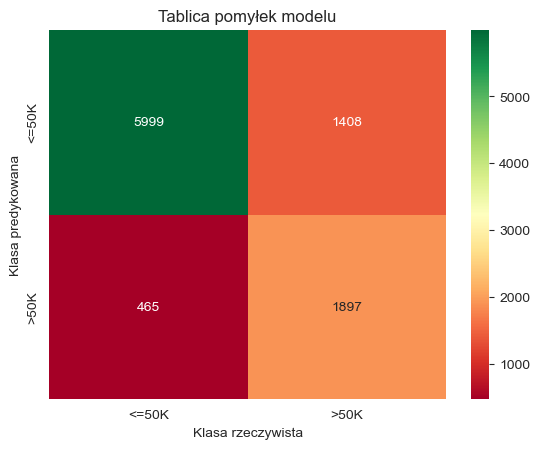

In [1724]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=y_test.value_counts().index)
cm_matrix = pd.DataFrame(data=cm, columns=y_test.value_counts().index,
                                 index=y_test.value_counts().index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Tablica pomyłek modelu')
plt.xlabel('Klasa rzeczywista')
plt.ylabel('Klasa predykowana')
plt.show()

Dokładność modelu zarówno dla danych testowych, jak i treningowych jest na poziomie 80%, a dokładność hipotezy zerowej na poziomie 75%. Na podstawie tych wartości można powiedzieć, że klasyfikator spisuje się bardzo dobrze podczas przewidywania czy osoba zawarta w tabeli zarabia powyżej, czy poniżej 50 tysięcy dolarów rocznie.

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

1. Model klasyfikujący kolumnę *race*

In [1725]:
X = df.drop(['race'], axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean()))
        for df2 in [X_train, X_test]:
            df2[col].fillna(X_train[col].mode()[0], inplace=True)

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [1726]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [1727]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [1728]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'sex', 'native_country', 'income'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [1729]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,1,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,1
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,1,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,1
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,1


In [1730]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,1
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,1
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,1,0


In [1731]:
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1732]:
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array(['Black', 'White', 'White', ..., 'White', 'White', 'Black'],
      dtype='<U18')

In [1733]:
y_test.value_counts()

White                 8388
Black                  911
Asian-Pac-Islander     318
Amer-Indian-Eskimo      80
Other                   72
Name: race, dtype: int64

In [1734]:
null_accuracy = (8388 / (8388 + 911 + 318 + 80 + 72))
print('Dokładność modelu dla danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Dokładność modelu dla danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))
print('Dokładność hipotezy zerowej: {0:0.4f}'.format(null_accuracy))

Dokładność modelu dla danych treningowych: 0.6763
Dokładność modelu dla danych testowych: 0.6721
Dokładność hipotezy zerowej: 0.8586


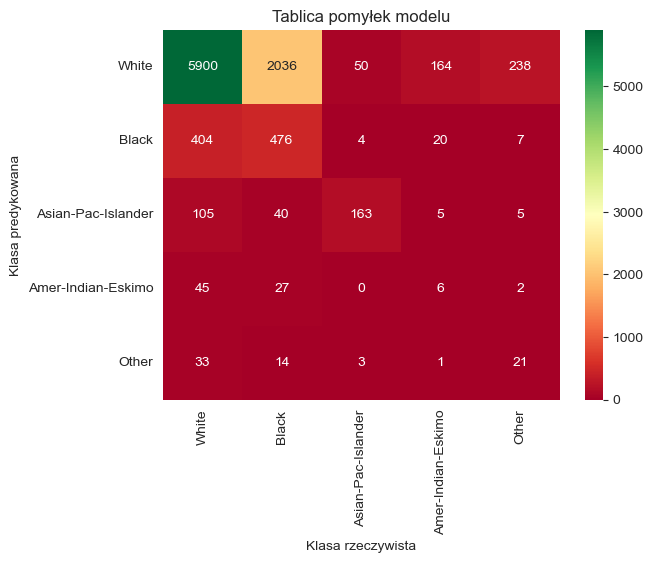

In [1735]:
cm = confusion_matrix(y_test, y_pred, labels=y_test.value_counts().index)
cm_matrix = pd.DataFrame(data=cm, columns=y_test.value_counts().index,
                         index=y_test.value_counts().index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Tablica pomyłek modelu')
plt.xlabel('Klasa rzeczywista')
plt.ylabel('Klasa predykowana')
plt.show()

Jak widać, tym razem klasyfikator rozpoznaję już rasę człowieka z mniejszą dokładnością, bo na poziomie około 67%, podczas gdy dokładność modelu dla hipotezy zerowej wynosi 85%. Taki wynik oznacza, że większą skuteczność uzyskano by gdyby założyć, że wszystkie osoby ze zbioru testowego są białe. Co ciekawe widać, że klasyfikator pomylił się największą ilość razy, przewidując niewłaściwie, że osoba czarnoskóra jest biała.

2. Model klasyfikujący kolumnę *native_country*

In [1736]:
X = df.drop(['native_country'], axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean()))
        for df2 in [X_train, X_test]:
            df2[col].fillna(X_train[col].mode()[0], inplace=True)
print('native_country', (y_train.isnull().mean()))
for df2 in [y_train, y_test]:
    df2.fillna(y_train.mode()[0], inplace=True)

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [1737]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income            0
dtype: int64

In [1738]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income            0
dtype: int64

In [1739]:
y_train.isnull().sum()

0

In [1740]:
y_test.isnull().sum()

0

In [1741]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'income'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [1742]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,1,0,7298,0,60,1,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,1,1831,0,38,0,1
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,1,0,0,0,50,1,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,1,0,0,0,40,0,1
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,1,0,0,0,25,0,1


In [1743]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,1,0,0,44,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,1,0,0,40,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,1,0,0,0,40,0,1
16505,46,1,0,0,0,0,0,0,0,147640,...,0,1,0,1,0,0,1902,40,0,1
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,1,0,0,2824,76,1,0


In [1744]:
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,7298.0,0.0,4.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,-1.0,1.0,1831.0,0.0,-0.4,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0


In [1745]:
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array(['Outlying-US(Guam-USVI-etc)', 'Outlying-US(Guam-USVI-etc)',
       'Yugoslavia', ..., 'Japan', 'Yugoslavia', 'Scotland'], dtype='<U26')

In [1746]:
y_test.value_counts()

United-States                 8892
Mexico                         208
Philippines                     73
Germany                         49
El-Salvador                     37
Canada                          37
India                           31
Puerto-Rico                     30
England                         29
Vietnam                         27
Jamaica                         26
Italy                           25
Cuba                            25
Dominican-Republic              23
South                           22
Poland                          22
Japan                           19
China                           17
Guatemala                       16
Iran                            13
Columbia                        13
Taiwan                          13
Nicaragua                       12
Haiti                           12
Greece                          10
Hong                             9
France                           9
Peru                             8
Ireland             

In [1747]:
null_accuracy = (8392 / y_test.value_counts().sum())
print('Dokładność modelu dla danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Dokładność modelu dla danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))
print('Dokładność hipotezy zerowej: {0:0.4f}'.format(null_accuracy))

Dokładność modelu dla danych treningowych: 0.0129
Dokładność modelu dla danych testowych: 0.0087
Dokładność hipotezy zerowej: 0.8590


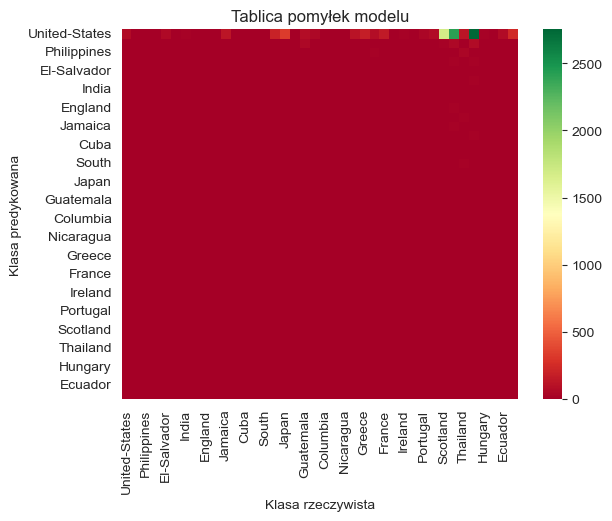

In [1748]:
cm = confusion_matrix(y_test, y_pred, labels=y_test.value_counts().index)
cm_matrix = pd.DataFrame(data=cm, columns=y_test.value_counts().index,
                         index=y_test.value_counts().index)
sns.heatmap(cm_matrix, fmt='d', cmap='RdYlGn')
plt.title('Tablica pomyłek modelu')
plt.xlabel('Klasa rzeczywista')
plt.ylabel('Klasa predykowana')
plt.show()

Tym razem model zdecydowanie zwraca bardzo złe wyniki. Jego dokładność wynosi zaledwie około 1% poprawnych predykcji, co oznacza, że jest on właściwie nieużywalny. Klasyfikator nie zwraca nawet poprawnych predykcji pochodzenia ze Stanów Zjednoczonych, które jest największą grupą wśród osób z bazy danych. Widać natomiast, że często rozpoznaje osoby z inyych krajów jako te pochodzące z USA. Prawdopodobnie na takie zachowanie modelu ma wpływ fakt, że w Stanach Zjednoczonych żyje bardzo dużo osób o innych korzeniach, przez co rozpoznanie Amerykanów z uwagi na ich charakterystyczne cechy jest dla klasyfikatora bardzo trudnym zadaniem.

 Na dokładność modelu może mieć wpływ bardzo wiele czynników. Pierwszym z nich jest ilość zmiennych w kolumnie, którą rozpoznaje klasyfikator. Im mniej ich jest, tym większe prawdopodobieństwo na wybranie przez niego właściwej opcji. Kolejnym czynnikiem jest ilość danych wejściowych. W naszym przypadku jest on niezwykle liczny (zawiera bowiem aż 32 tysiące rekordów). Na wartość wyniku ma również wpływ korelacja zmiennych treningowych predyktora X ze zmienną objaśnianą y.